In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
def build_skeleton(graph_adj, skeleton_adj, n):
    skeleton_connection = [0 for i in range(n)]
    # connect first two vertices
    build_skeleton_i = 1
    min_weight_i, min_weight_j = 0, 1
    min_weight = graph_adj[min_weight_i][min_weight_j]
    for i in range(n):
        for j in range(i + 1, n):
            if min_weight > graph_adj[i][j]:
                min_weight = graph_adj[i][j]
                min_weight_i, min_weight_j = i, j
    skeleton_adj[min_weight_i][min_weight_j] = min_weight
    skeleton_adj[min_weight_j][min_weight_i] = skeleton_adj[min_weight_i][min_weight_j]
    skeleton_connection[min_weight_i] = skeleton_connection[min_weight_j] = 1
    # while there are non-connected vertices
    while 0 in skeleton_connection:
        build_skeleton_i += 1
        min_weight = None
        min_weight_i = min_weight_j = None
        for i in range(n):
            if skeleton_connection[i] == 1:
                for j in range(n):
                    if i == j or skeleton_connection[j] == 1 or skeleton_adj[i][j] != 0:
                        continue
                    if min_weight is None or min_weight > graph_adj[i][j]:
                        min_weight = graph_adj[i][j]
                        min_weight_i, min_weight_j = i, j
        skeleton_adj[min_weight_i][min_weight_j] = min_weight
        skeleton_adj[min_weight_j][min_weight_i] = skeleton_adj[min_weight_i][min_weight_j]
        skeleton_connection[min_weight_i] = skeleton_connection[min_weight_j] = 1

In [5]:
def draw_graph(adj, n, clustered_vertices=None):
    # build graph
    G = nx.Graph()
    for i in range(len(adj)):
        G.add_node(i)
    for i in range(n):
        for j in range(i + 1, n):
            if adj[i][j] != 0:
                G.add_edge(i, j)
    edge_labels = {}
    for i in range(n):
        for j in range(i + 1, n):
            if adj[i][j] != 0:
                edge_labels[(i, j)] = adj[i][j]

    # draw graph
    # pos = nx.spring_layout(G)
    # edges = nx.get_edge_attributes(G, "weight")
    # nx.draw_networkx_edge_labels(G, pos, edges)
    # nx.draw(G, pos)
    pos = nx.shell_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # draw clusters
    if clustered_vertices is not None:
        for i in range(len(clustered_vertices)):
            current_vertex_cluster = clustered_vertices[i]
            x, y = pos[i]
            plt.text(x, y + 0.1, s=str(current_vertex_cluster), bbox=dict(facecolor='green', alpha=0.5),
                     horizontalalignment='right')
    plt.show()

In [6]:
def separate_clusters(graph_adj, n, k):
    # remove K - 1 max weight edges
    for c in range(k - 1):
        # find max weight edge
        max_weight = None
        max_weight_i = max_weight_j = None
        for i in range(n):
            for j in range(i + 1, n):
                if graph_adj[i][j] != 0 and (max_weight is None or graph_adj[i][j] > max_weight):
                    max_weight = graph_adj[i][j]
                    max_weight_i = i
                    max_weight_j = j
        # delete max weight edge
        graph_adj[max_weight_i][max_weight_j] = graph_adj[max_weight_j][max_weight_i] = 0

In [7]:
def cluster_graph(graph_adj, n):
    clustered_vertices = [-1 for i in range(n)]
    # cluster graph
    last_cluster_number = 1
    vertices_to_visit = [0]
    while len(vertices_to_visit) > 0:
        current_vertex = vertices_to_visit.pop()
        current_cluster_number = clustered_vertices[current_vertex]
        adj_vertices = []
        for j in range(n):
            if graph_adj[current_vertex][j] != 0:
                adj_vertices.append(j)
                if clustered_vertices[j] != -1:
                    current_cluster_number = clustered_vertices[j]

        if current_cluster_number == -1:  # new cluster
            current_cluster_number = last_cluster_number
            last_cluster_number += 1

        # assign current and adjacent vertices to cluster
        clustered_vertices[current_vertex] = current_cluster_number
        for adj_vertex in adj_vertices:
            if clustered_vertices[adj_vertex] == -1:
                vertices_to_visit.append(adj_vertex)
                clustered_vertices[adj_vertex] = current_cluster_number
            elif adj_vertex in vertices_to_visit:
                vertices_to_visit.remove(adj_vertex)

        # switch to next cluster
        if len(vertices_to_visit) == 0:
            for i in range(n):
                if clustered_vertices[i] == -1:
                    vertices_to_visit.append(i)
                    break
    return clustered_vertices

In [8]:
def weight(n):
    array = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            array[i][j] = array[j][i] = np.random.randint(10, 100)
    return array

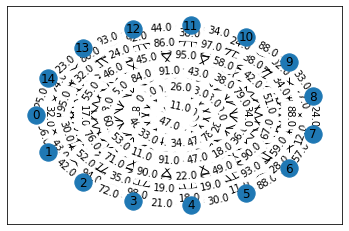

In [9]:
n = 15
k = 5

skeleton_adj = [[0 for j in range(n)] for i in range(n)]
graph_adj = weight(n)
draw_graph(graph_adj, n)

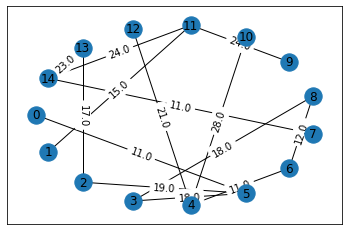

In [10]:
#build skeleton
build_skeleton(graph_adj, skeleton_adj, n)
draw_graph(skeleton_adj, n)

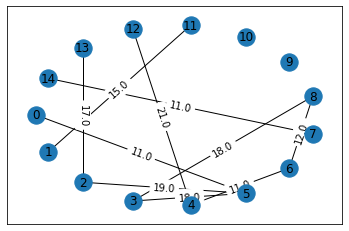

In [11]:
# separate clusters
separate_clusters(skeleton_adj, n, k)
draw_graph(skeleton_adj, n)


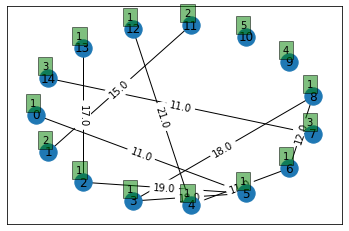

In [12]:
# assign vertices to clusters
clustered_vertices = cluster_graph(skeleton_adj, n)
draw_graph(skeleton_adj, n, clustered_vertices)